# Генерация данных

## Условия:

value - это значение на конец дня абсолютное куммулятивное значение расхода энергоносителя, например воды.  
Счетчик который это генерирует - отправляет данные раз в день. Он отправляет точное значение на текущий день.

- Есть дни в которых нет value.

- Есть пропущенные дни впринципе, есть неверные даты.

- Есть неупорядоченные даты.

Генерируем данные таким способом, чтобы они были максимально приближены к реальному потреблению. Например, первый месяц года потребления значительно меньше остальных, затем до самого лета чуть больше, летом естественно меньше и затем снова больше. Итак каждый год.

#### Библиотеки:

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns

In [3]:
date = pd.date_range("2018-01-01", "2021-12-31")

integer_list = random.sample(range(0, 999000), 1461)
'''
integer_list2 = random.sample(range(0, 999000), 122)
integer_list3 = random.sample(range(0, 999000), 90)
integer_list4 = random.sample(range(0, 999000), 122)

integer_list5 = random.sample(range(0, 999000), 31)
integer_list6 = random.sample(range(0, 999000), 122)
integer_list7 = random.sample(range(0, 999000), 90)
integer_list8 = random.sample(range(0, 999000), 122)

integer_list9 = random.sample(range(0, 999000), 31)
integer_list10 = random.sample(range(0, 999000), 122)
integer_list11 = random.sample(range(0, 999000), 90)
integer_list12 = random.sample(range(0, 999000), 122)

integer_list13 = random.sample(range(0, 999000), 31)
integer_list14 = random.sample(range(0, 999000), 122)
integer_list15 = random.sample(range(0, 999000), 90)
integer_list16 = random.sample(range(0, 999000), 123)
'''


#integer_list = integer_list1 + integer_list2 + integer_list3+integer_list4+integer_list5+integer_list6+integer_list7+integer_list8+integer_list9+integer_list10+integer_list11+integer_list12+integer_list13+integer_list14+integer_list15+integer_list16
value = [x/1000 for x in integer_list]
data = {'date':pd.date_range("2018-01-01", "2021-12-31"), 'value': [x/1000 for x in integer_list]}
table= pd.DataFrame(data)

summ = []
sum = 0 
value = table['value']
for i in value:
    sum += i
    summ.append(sum)
#print(summ)   

table['value'] = summ  

# сохраняем все в файл

#table.to_csv('C:/pythonushka/my_new_file1.csv', index=False)

#выводим на экран
print(table)

           date       value
0    2018-01-01     327.643
1    2018-01-02     769.629
2    2018-01-03    1571.790
3    2018-01-04    1839.103
4    2018-01-05    2409.826
...         ...         ...
1456 2021-12-27  723962.319
1457 2021-12-28  724811.564
1458 2021-12-29  725319.633
1459 2021-12-30  725760.805
1460 2021-12-31  726452.659

[1461 rows x 2 columns]


### Представление данных в виде графиков

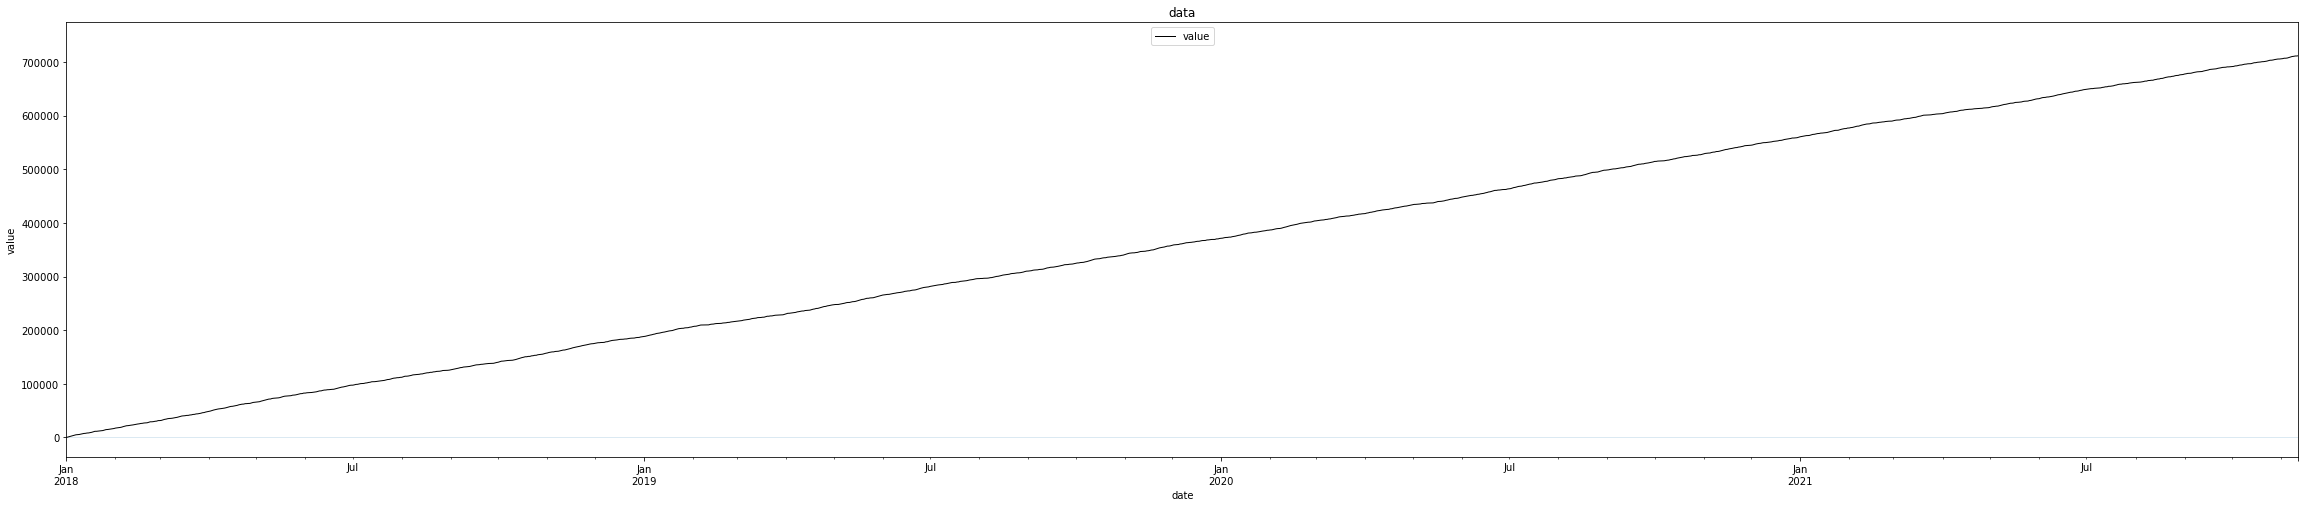

In [4]:
url = 'C:/pythonushka/my_new_file1.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show() 

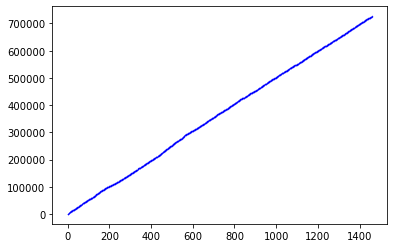

In [5]:
x = table.index.values  
y = table['value'].values
plt.scatter(x, y,s=0.1 ,color='blue')

<AxesSubplot:xlabel='date'>

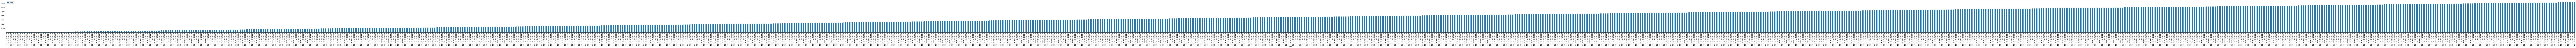

In [6]:
table.plot.bar(x='date', y='value', figsize=(400,5))

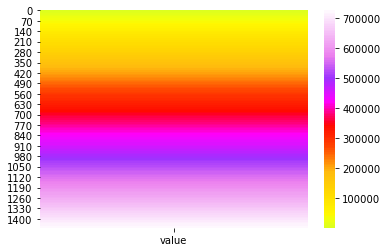

In [7]:
data = pd.DataFrame(table['value'], columns=["value"])
# Plot the heatmap
heatmap_plot = sns.heatmap(data, center=0, cmap='gist_ncar')

plt.show()

## Частичное удаление данных ( создание пропусков)

### Удалим 20% данных и создадим пропуски по неделе - месяцу 

In [15]:
df = pd.read_csv('C:/pythonushka/my_new_file1.csv')

df = pd.DataFrame( summ,
                      columns=["value"],
                      index=date)


df = df.drop(df[(df.index > '2018-01-01') & (df.index < '2018-01-15')].index) # 1:16
df = df.drop(df[(df.index > '2018-06-15') & (df.index < '2018-06-30')].index) # 
df = df.drop(df[(df.index > '2018-12-25') & (df.index < '2018-01-31')].index) # 
df = df.drop(df[(df.index > '2019-02-12') & (df.index < '2019-02-22')].index) # 
df = df.drop(df[(df.index > '2019-08-01') & (df.index < '2019-09-01')].index) # 
df = df.drop(df[(df.index > '2019-12-12') & (df.index < '2019-12-18')].index) # 
df = df.drop(df[(df.index > '2020-05-12') & (df.index < '2020-05-19')].index) #  
df = df.drop(df[(df.index > '2020-06-12') & (df.index < '2020-06-19')].index) # 
df = df.drop(df[(df.index > '2021-12-25') & (df.index < '2021-12-31')].index) # 
#print(df)

df = df.mask(np.random.choice([True, False], size=df.shape, p=[.20,.80]))
#print(df.isna().sum())
#print(df)

df = df.iloc[np.random.permutation(len(df))]
df['date'] = df.index
index = [i for i in range(df.shape[0])]
random.shuffle(index)
df = df.set_index([index]).sort_index()
#print(df)

#df.pop('date')
#print(df)
#df['value']

df1 = {'date':pd.date_range("2018-01-01", "2021-12-31"), 'value': np.nan }
df1 = pd.DataFrame(df1)
#df1 = df1.set_index(df1['date']).sort_index()
#df1.pop('date')
#print(df1)

df1['value'] = df1['date'].map(df.set_index('date')['value'])
df1.to_csv('C:/pythonushka/my_new_file999.csv', index=False)
#print(df1)
#print(df.isna().sum())
print(df1)



#datanan = df1
#datanan.fillna(0, inplace=True)
#nana = []
#nana.append(datanan['value'])
#NAN = []

#for i in range(len(datanan)):
#    if i <= 1:
#        NAN.append(datanan.index)
#print(NAN)
#datanan['nan'] = NAN
#print(datanan)

#Nan = {'nan': NAN}
#NANA= pd.DataFrame(Nan)
#print(NANA)

           date       value
0    2018-01-01     327.643
1    2018-01-02         NaN
2    2018-01-03         NaN
3    2018-01-04         NaN
4    2018-01-05         NaN
...         ...         ...
1456 2021-12-27         NaN
1457 2021-12-28         NaN
1458 2021-12-29         NaN
1459 2021-12-30         NaN
1460 2021-12-31  726452.659

[1461 rows x 2 columns]


### Представление данных в виде графиков

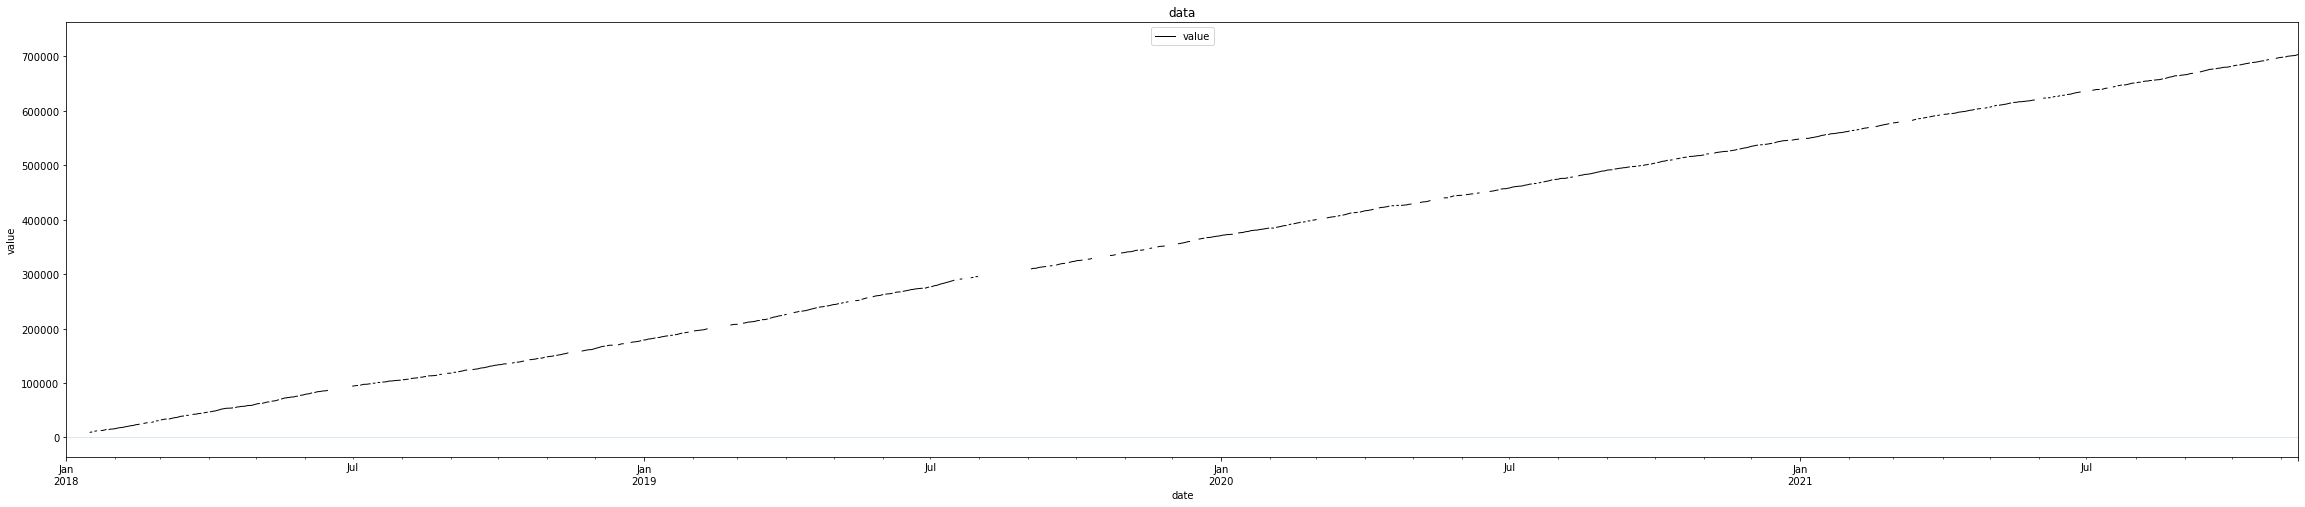

In [16]:
url = 'C:/pythonushka/my_new_file999.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

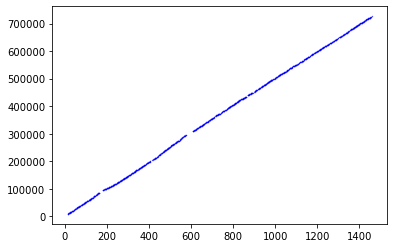

In [10]:
x = df1.index.values  
y = df1['value'].values
plt.scatter(x, y,s=0.1 ,color='blue')

<AxesSubplot:xlabel='date'>

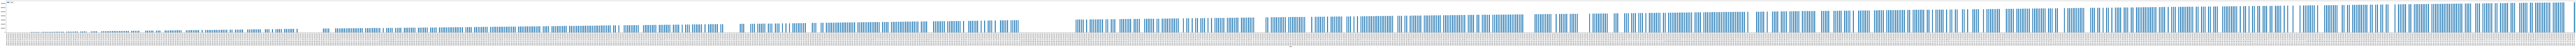

In [11]:
df1.plot.bar(x='date', y='value', figsize=(400,5))